# Figure 1: metrics from final trained model - ROC, PR curves

Run all cells to:
* test trained model on befree and svensson genes
* get ROC/PR curves, classification table, confusion matrix

* note: not using any thresholding on the befree or svensson sets

In [2]:
import os
import pickle as pkl
import pandas as pd
from sklearn.metrics import *
import matplotlib.pyplot as plt
import sys
plt.style.use('ggplot')


# make files for each positive set
if not os.path.exists('befree'):
    os.makedirs('befree')
if not os.path.exists('sven'):
    os.makedirs('sven')

## 1. Load trained model

In [3]:
sys.path.append(r'../../scripts') # for unpickling
nash_svc = pkl.load(open('../../results/final_model_svc/nash_model_trained.pkl', 'rb'))
feature_selector = nash_svc.skb
model = nash_svc.clf

## 2. Define functions for testing

In [4]:
def evaluate(clf, test_X, test_y, save_path):
    """
    Calculates metrics for clf on test set: classification accuracy, ROC curve, PR curve, confusion matrix
    """
    predicted_y = clf.predict(test_X)
    report = pd.DataFrame.from_dict(classification_report(test_y, predicted_y, output_dict=True)).T
    print(report)
    report.to_csv(save_path + '/classification_report.csv')

    plot_roc_curve(clf, test_X, test_y)
    plt.title('ROC')
    plt.plot([0, 1], [0, 1], 'b--')
    plt.savefig(save_path + '/roc.png')
    plt.show()

    plot_precision_recall_curve(clf, test_X, test_y)
    plt.plot([0, 1], [1, 0], 'b--')
    plt.title('PR')
    plt.savefig(save_path + '/PR.png')
    plt.show()

    plot_confusion_matrix(clf, test_X, test_y)
    plt.savefig(save_path + '/confusion_matrix.png')
    plt.show()

## 3. Test on befree genes and save to folder

              precision    recall  f1-score     support
0              0.615942  0.850000  0.714286  200.000000
1              0.870690  0.655844  0.748148  308.000000
accuracy       0.732283  0.732283  0.732283    0.732283
macro avg      0.743316  0.752922  0.731217  508.000000
weighted avg   0.770395  0.732283  0.734816  508.000000


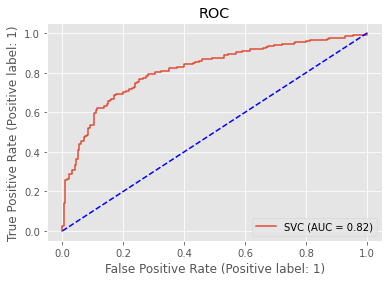

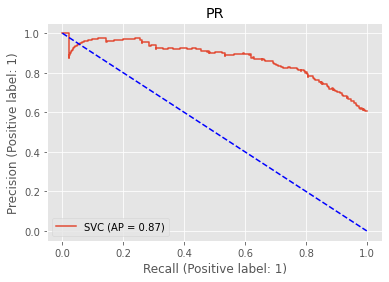

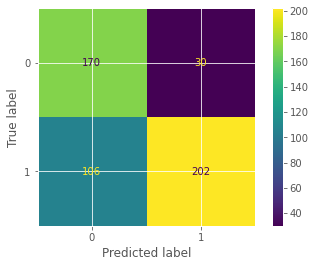

In [6]:
befree_genes = nash_svc.M.befree_genes 
test_X, test_y = nash_svc.format_input(befree_genes, nash_svc.neg_test_genes)
evaluate(model, test_X, test_y, 'befree')

## 4. Test on svensson genes and save to folder

              precision    recall  f1-score    support
0              0.805687  0.850000  0.827251  200.00000
1              0.719626  0.652542  0.684444  118.00000
accuracy       0.776730  0.776730  0.776730    0.77673
macro avg      0.762657  0.751271  0.755848  318.00000
weighted avg   0.773753  0.776730  0.774260  318.00000


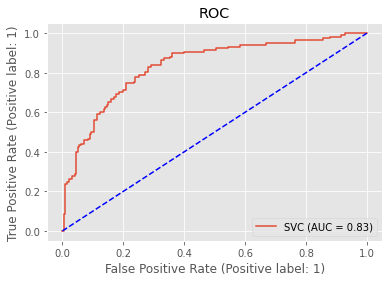

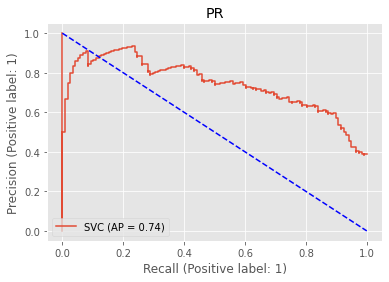

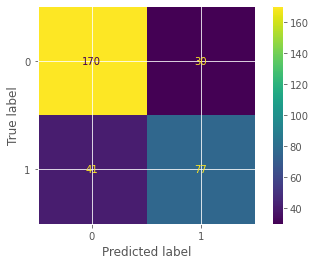

In [7]:
sven_genes = nash_svc.M.sven_genes
test_X, test_y = nash_svc.format_input(sven_genes, nash_svc.neg_test_genes)
evaluate(model, test_X, test_y, 'sven')